# Deep Learning: Ex.4 - CIFAR-10

Submitted by: Noam Bassat 308465434


In [1]:
# TensorFlow and tf.keras
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from seaborn import heatmap 


### Load the CIFAR-10 Dataset

When running this command for the first time, it will download dataset from a remote server, which might take some time.. (in case of server error - just try again a bit later)

train_images.shape = (50000, 32, 32, 3)
train_labels.shape = (50000,)
test_images.shape = (10000, 32, 32, 3)
test_labels.shape = (10000,)


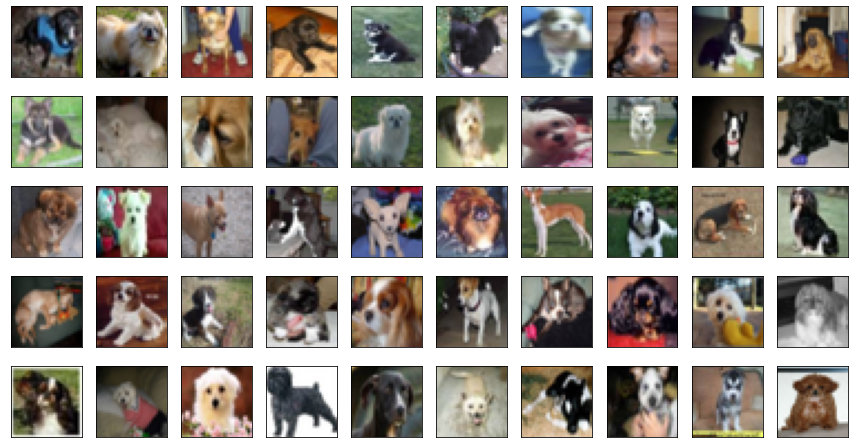

In [2]:
# 1. load/download the data
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# 2. flatten the labels (easier to deal with)
train_labels = train_labels.flatten()  # (50000, 1) -> (50000,)
test_labels = test_labels.flatten()    # (10000, 1) -> (10000,)

# 3. convert uint8->float32 and normalize range to 0.0-1.0 
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# 4. define the 10 classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# 5. print the shapes
print('train_images.shape =',train_images.shape)
print('train_labels.shape =',train_labels.shape)
print('test_images.shape =',test_images.shape)
print('test_labels.shape =',test_labels.shape)

# 6. lets plot some 'dogs'
[idx] = np.where(train_labels==5) # find all the dogs
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(train_images[idx[i]])
    plt.xticks([]), plt.yticks([])

***

- We will try different models (build, fit on training data, and evaluate on test data).

- The input layer is the images (32x32x3), and the output layer is a `softmax` 10 units (one unit for each class).

- For each model, plot the train/test loss & accuracy plots (as shown in class).

- Summarize the results of all models in the table below:


<table>
  <tr>
    <th>Model</th>
    <th>#parameters</th>
    <th>epochs</th>
    <th>train accuracy</th>
    <th>test accuracy</th>
  </tr>
    
  <!-- copy this block once for every model you tested -->  
  <tr> 
    <td>1. No hidden layers</td>   <!-- Model -->
    <td>98,666 </td> <!-- #parameters -->
    <td>200</td> <!-- epochs -->
    <td>0.5041</td> <!-- train accuracy -->
    <td>0.4389</td> <!-- test accuracy -->
  </tr>
    
  <tr> 
    <td>2. Simple ConvNet </td>   <!-- Model -->
    <td>2,882,006 </td> <!-- #parameters -->
    <td>60</td> <!-- epochs -->
    <td>1.0</td> <!-- train accuracy -->
    <td>0.5897</td> <!-- test accuracy -->
  </tr>
  <tr> 
    <td>3. Bigger ConvNet</td>   <!-- Model -->
    <td>356,810 </td> <!-- #parameters -->
    <td>60</td> <!-- epochs -->
    <td>1.0</td> <!-- train accuracy -->
    <td>0.7482</td> <!-- test accuracy -->
  </tr>
  <tr> 
    <td>4. Add "Dropout"</td>   <!-- Model -->
    <td>356,810 </td> <!-- #parameters -->
    <td>60</td> <!-- epochs -->
    <td>0.8194</td> <!-- train accuracy -->
    <td>0.7924</td> <!-- test accuracy -->
  </tr>
    

</table>




In [3]:
def plot_history(history):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],':r')
    plt.plot(history.history['val_loss'],'r')
    plt.title('Loss',fontsize=14)
    plt.xlabel('Epochs',fontsize=14)
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],':b')
    plt.plot(history.history['val_accuracy'],'b')
    plt.ylim([0, 1])
    plt.title('Accuracy',fontsize=12)
    plt.xlabel('Epochs',fontsize=12)
    plt.grid()
    
    
    
    
def comple_and_train_the_model(model, epochs_num):
    # compile the model:
    sgd_momentum = keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=sgd_momentum, # stochastic gradient descent
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # train the model - with validation
    history = model.fit(train_images, train_labels, epochs=epochs_num, batch_size=128, 
                        validation_data=(test_images,test_labels))
    
    return history

***
### 1. No hidden layers

Just connect all inputs directly to the output layer (always remember to add a `Flatten` layer before using a `Dense` layer)


In [4]:
# define our model:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                98336     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = comple_and_train_the_model(model,200)

Epoch 1/200
391/391 [==============================] - 3s 5ms/step - loss: 2.1415 - accuracy: 0.2089 - val_loss: 1.9288 - val_accuracy: 0.2821
Epoch 2/200
391/391 [==============================] - 2s 4ms/step - loss: 1.8743 - accuracy: 0.3191 - val_loss: 1.8648 - val_accuracy: 0.3020
Epoch 3/200
391/391 [==============================] - 2s 4ms/step - loss: 1.8255 - accuracy: 0.3389 - val_loss: 1.8030 - val_accuracy: 0.3381
Epoch 4/200
391/391 [==============================] - 2s 4ms/step - loss: 1.8047 - accuracy: 0.3457 - val_loss: 1.7613 - val_accuracy: 0.3591
Epoch 5/200
391/391 [==============================] - 2s 4ms/step - loss: 1.7769 - accuracy: 0.3524 - val_loss: 1.7638 - val_accuracy: 0.3559
Epoch 6/200
391/391 [==============================] - 2s 4ms/step - loss: 1.7672 - accuracy: 0.3602 - val_loss: 1.7833 - val_accuracy: 0.3422
Epoch 7/200
391/391 [==============================] - 2s 4ms/step - loss: 1.7362 - accuracy: 0.3754 - val_loss: 1.7496 - val_accuracy: 0.3696

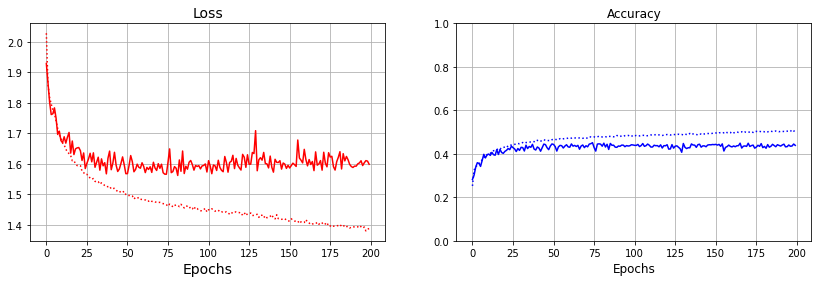

In [6]:
plot_history(history)

***
### 2. Simple ConvNet

Use 32 kernels (3x3, Conv2D), followed by additional 100-Dense layer.


In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2880100   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 2,882,006
Trainable params: 2,882,006
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = comple_and_train_the_model(model,60)

Epoch 1/60
391/391 [==============================] - 5s 10ms/step - loss: 1.9188 - accuracy: 0.3051 - val_loss: 1.4995 - val_accuracy: 0.4662
Epoch 2/60
391/391 [==============================] - 3s 9ms/step - loss: 1.4491 - accuracy: 0.4808 - val_loss: 1.3129 - val_accuracy: 0.5256
Epoch 3/60
391/391 [==============================] - 3s 9ms/step - loss: 1.2533 - accuracy: 0.5575 - val_loss: 1.2211 - val_accuracy: 0.5637
Epoch 4/60
391/391 [==============================] - 3s 9ms/step - loss: 1.1316 - accuracy: 0.6049 - val_loss: 1.2294 - val_accuracy: 0.5726
Epoch 5/60
391/391 [==============================] - 3s 9ms/step - loss: 1.0500 - accuracy: 0.6300 - val_loss: 1.2061 - val_accuracy: 0.5786
Epoch 6/60
391/391 [==============================] - 3s 9ms/step - loss: 0.9540 - accuracy: 0.6669 - val_loss: 1.2178 - val_accuracy: 0.5756
Epoch 7/60
391/391 [==============================] - 3s 9ms/step - loss: 0.8709 - accuracy: 0.6938 - val_loss: 1.2326 - val_accuracy: 0.5809
Epoch

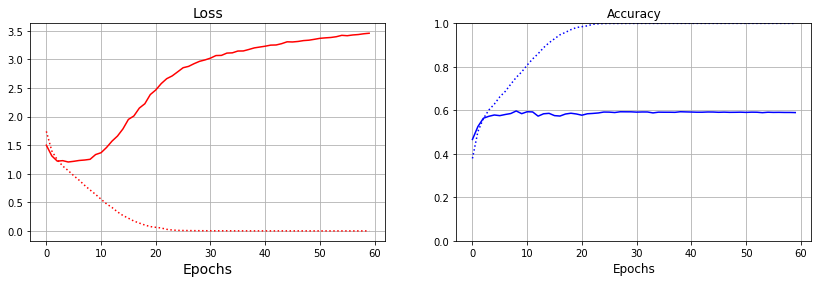

In [9]:
plot_history(history)

***
### 3. Bigger ConvNet

Apply the following layers (between the input and output layers):
- 32 3x3-`Conv2D` + 2x2 `MaxPooling`
- 64 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128 3x3-`Conv2D` + 2x2 `MaxPooling`
- 128-`Dense`

Use `padding='same'` in the Conv2D layers.

In [10]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [11]:
history = comple_and_train_the_model(model,60)

Epoch 1/60
391/391 [==============================] - 6s 14ms/step - loss: 2.0925 - accuracy: 0.2222 - val_loss: 1.4956 - val_accuracy: 0.4620
Epoch 2/60
391/391 [==============================] - 5s 13ms/step - loss: 1.4539 - accuracy: 0.4781 - val_loss: 1.2887 - val_accuracy: 0.5431
Epoch 3/60
391/391 [==============================] - 5s 13ms/step - loss: 1.2532 - accuracy: 0.5554 - val_loss: 1.1278 - val_accuracy: 0.6006
Epoch 4/60
391/391 [==============================] - 5s 13ms/step - loss: 1.0830 - accuracy: 0.6193 - val_loss: 1.0535 - val_accuracy: 0.6285
Epoch 5/60
391/391 [==============================] - 5s 13ms/step - loss: 0.9467 - accuracy: 0.6625 - val_loss: 0.9848 - val_accuracy: 0.6625
Epoch 6/60
391/391 [==============================] - 5s 13ms/step - loss: 0.8523 - accuracy: 0.7042 - val_loss: 0.9271 - val_accuracy: 0.6860
Epoch 7/60
391/391 [==============================] - 5s 13ms/step - loss: 0.7650 - accuracy: 0.7324 - val_loss: 0.9047 - val_accuracy: 0.6917

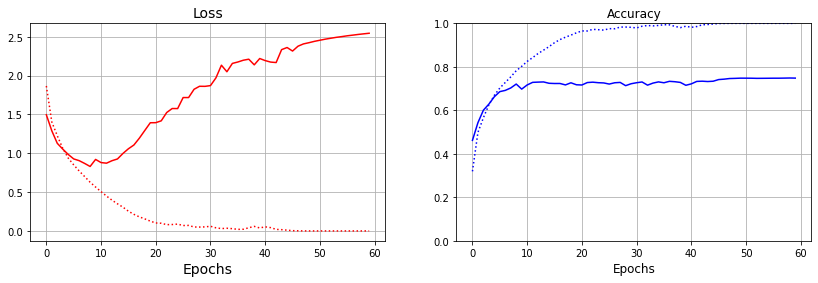

In [12]:
plot_history(history)

***
### 4. Add "Dropout"

Use the previous model architecture. Add a `Dropout(0.2)` layer, after each and every of the `MaxPooling` layers. Add `Dropout(0.5)` layer between the two dense layers.

In [13]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

In [14]:
history = comple_and_train_the_model(model,60)

Epoch 1/60
391/391 [==============================] - 7s 15ms/step - loss: 2.1801 - accuracy: 0.1814 - val_loss: 1.7860 - val_accuracy: 0.3685
Epoch 2/60
391/391 [==============================] - 6s 14ms/step - loss: 1.7481 - accuracy: 0.3614 - val_loss: 1.4904 - val_accuracy: 0.4609
Epoch 3/60
391/391 [==============================] - 6s 14ms/step - loss: 1.5457 - accuracy: 0.4337 - val_loss: 1.3394 - val_accuracy: 0.5208
Epoch 4/60
391/391 [==============================] - 6s 15ms/step - loss: 1.4183 - accuracy: 0.4899 - val_loss: 1.2427 - val_accuracy: 0.5572
Epoch 5/60
391/391 [==============================] - 6s 14ms/step - loss: 1.3289 - accuracy: 0.5245 - val_loss: 1.2352 - val_accuracy: 0.5722
Epoch 6/60
391/391 [==============================] - 6s 14ms/step - loss: 1.2680 - accuracy: 0.5453 - val_loss: 1.1174 - val_accuracy: 0.6003
Epoch 7/60
391/391 [==============================] - 6s 14ms/step - loss: 1.2018 - accuracy: 0.5712 - val_loss: 1.0490 - val_accuracy: 0.6288

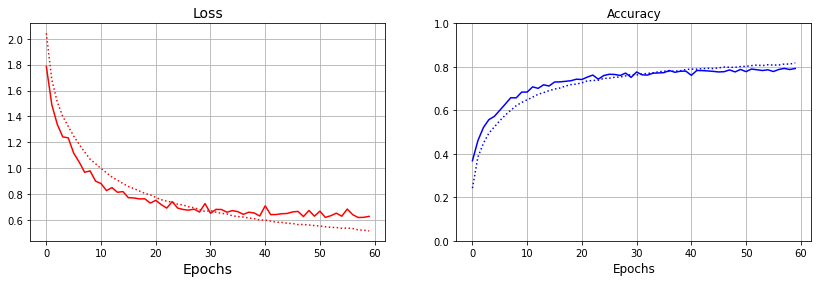

In [15]:
plot_history(history)

***
### Confusion matrix

Plot the confusion matrix for the last model.

In [17]:
y_pred = np.argmax(model.predict(test_images),axis=1)
M = confusion_matrix(test_labels, y_pred)
M

array([[842,   9,  30,  16,  11,   6,  12,  12,  44,  18],
       [  6, 907,   5,   6,   2,   4,  11,   1,  20,  38],
       [ 60,   0, 641,  40,  95,  50,  84,  21,   7,   2],
       [ 16,   6,  57, 582,  65, 159,  82,  19,   5,   9],
       [ 13,   2,  34,  30, 798,  23,  55,  40,   4,   1],
       [  6,   0,  29, 114,  57, 731,  34,  24,   1,   4],
       [  3,   1,  18,  29,  20,  10, 913,   0,   4,   2],
       [  9,   2,  33,  22,  66,  37,   8, 822,   1,   0],
       [ 59,  14,  11,   7,   3,   6,   8,   3, 878,  11],
       [ 27,  79,   8,  19,   2,  10,  13,  12,  20, 810]])

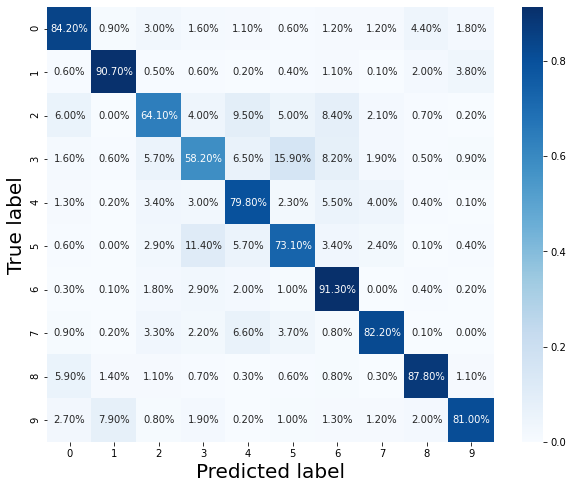

In [19]:
CM = M / M.sum(axis=1) # normalize each row (to sum = 1)

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
plt.figure(figsize=(10,8))
heatmap(CM,cmap='Blues',annot=True, fmt='.2%')
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.show()

---
### Model shape and parameters

Fill the following table, corresponding to the last model (one row for each of the model's layers):

<table>
  <tr>
    <th>Layer</th>
    <th>Activations shape</th>
    <th>Weights shape</th>
  </tr>
    
  <tr> 
    <td> input </td>   <!-- layer -->
    <td> (32,32,3) </td> <!-- activations shape -->
    <td>     </td> <!-- weights shape -->
  </tr>
    
  <!-- copy this block once for each layer in the model -->  
   <tr> 
    <td> 32-Conv </td>   <!-- layer -->
    <td> (32,32,32) </td> <!-- activations shape -->
    <td> (3,3,3,32) </td> <!-- weights shape -->
  </tr>
   <tr> 
    <td> MaxPooling2D </td>   <!-- layer -->
    <td> (16,16,32) </td> <!-- activations shape -->
    <td> </td> <!-- weights shape -->
  </tr>
   <tr> 
    <td> Dropout </td>   <!-- layer -->
    <td> (16, 16, 32) </td> <!-- activations shape -->
    <td>  </td> <!-- weights shape -->
  </tr>
    
   <tr> 
    <td> 64-Conv </td>   <!-- layer -->
    <td>(16,16,64)</td> <!-- activations shape -->
    <td> (3,3,32,64) </td> <!-- weights shape -->
  </tr>
    
   <tr> 
    <td> MaxPooling2D </td>   <!-- layer -->
    <td> (8,8,64) </td> <!-- activations shape -->
    <td>  </td> <!-- weights shape -->
  </tr>
    
    
   <tr> 
    <td> Dropout </td>   <!-- layer -->
    <td> (8,8,64) </td> <!-- activations shape -->
    <td>  </td> <!-- weights shape -->
  </tr>
    
    
    
   <tr> 
    <td> 128-Conv </td>   <!-- layer -->
    <td> (8,8,128) </td> <!-- activations shape -->
    <td> (3,3,64,128) </td> <!-- weights shape -->
  </tr>
    
    
    
   <tr> 
    <td> MaxPooling2D </td>   <!-- layer -->
    <td> (4,4,128) </td> <!-- activations shape -->
    <td>  </td> <!-- weights shape -->
  </tr>
    
   <tr> 
    <td> Dropout </td>   <!-- layer -->
    <td> (4,4,128) </td> <!-- activations shape -->
    <td>  </td> <!-- weights shape -->
  </tr>
    
    
   <tr> 
    <td> Flatten </td>   <!-- layer -->
    <td> (1,1,2048) </td> <!-- activations shape -->
    <td>  </td> <!-- weights shape -->
  </tr>
 
   <tr> 
    <td> 128-Dense </td>   <!-- layer -->
    <td> (1,1,128)</td> <!-- activations shape -->
    <td> (2048,128) </td> <!-- weights shape -->
  </tr>
 
   <tr> 
    <td> Dropout </td>   <!-- layer -->
    <td> (1,1,128) </td> <!-- activations shape -->
    <td>  </td> <!-- weights shape -->
  </tr>
 
   <tr> 
    <td> 10-Dense </td>   <!-- layer -->
    <td> (1,1,10) </td> <!-- activations shape -->
    <td> (128,10) </td> <!-- weights shape -->
  </tr>
 
    
    
    
    
     
</table>

***
## Good Luck!